# <span style='color:blue'><center>Classify monkey photographs</center></span>

Using a convolutional neural network to try to classify monkey pictures according to their species.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout

In [2]:
def label_of_some_monkey(img_url_monkey, monkey_labels):
    the_label = img_url_monkey.split('/')[-2]
    the_label = list((monkey_labels[monkey_labels.Label == the_label])['CommonName'])[0]
    return the_label

In [3]:
training_path = '10-monkey-species/training/'
testing_path = '10-monkey-species/validation/'
monkey_labels = pd.DataFrame.from_csv('10-monkey-species/monkey_labels.csv', sep = ',', index_col=None)
monkey_labels

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


,Label,LatinName,CommonName,TrainImages,ValidationImages
0,n0,alouatta_palliata,mantled_howler,131,26
1,n1,erythrocebus_patas,patas_monkey,139,28
2,n2,cacajao_calvus,bald_uakari,137,27
3,n3,macaca_fuscata,japanese_macaque,152,30
4,n4,cebuella_pygmea,pygmy_marmoset,131,26
5,n5,cebus_capucinus,white_headed_capuchin,141,28
6,n6,mico_argentatus,silvery_marmoset,132,26
7,n7,saimiri_sciureus,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


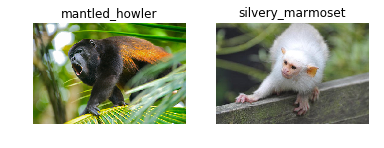

In [4]:
some_image_link = '10-monkey-species/training/n0/n0029.jpg'
some_image_link_2 = '10-monkey-species/training/n6/n6146.jpg'
some_image = plt.imread(some_image_link)
some_image_2 = plt.imread(some_image_link_2)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(some_image)
plt.title(label_of_some_monkey(some_image_link, monkey_labels))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(some_image_2)
plt.title(label_of_some_monkey(some_image_link_2, monkey_labels))
plt.axis('off')
plt.show()

In [9]:
height = 150
width = 150
color_channels = 3
batch_size = 64
num_classes = len(list(monkey_labels.Label))

training_data = ImageDataGenerator( rescale = 1./255 )
training_gen = training_data.flow_from_directory( training_path, target_size = (height, width), 
                                                 batch_size = batch_size, class_mode = 'categorical' )
    
    
testing_data = ImageDataGenerator( rescale = 1./255 )
testing_gen = testing_data.flow_from_directory( testing_path, target_size = (height, width), 
                                                 batch_size = batch_size, class_mode = 'categorical' )    

Found 1097 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [14]:
monkeys_model = Sequential()
monkeys_model.add( Conv2D( 256, kernel_size=(3, 3), strides=2, activation='relu', input_shape=(height, width, 3 ) ))
monkeys_model.add( Conv2D( 256, kernel_size=(3, 3), strides=2, activation='relu' ) )
monkeys_model.add( Conv2D( 128, kernel_size=(3, 3), strides=2, activation='relu' ) )
monkeys_model.add( Conv2D( 128, kernel_size=(3, 3), strides=2, activation='relu' ) )
monkeys_model.add( Flatten() )
monkeys_model.add( Dense( 128, activation='relu' ) )
monkeys_model.add( Dense( 64, activation='relu' ) )
monkeys_model.add( Dense( 64, activation='relu' ) )
monkeys_model.add( Dense(num_classes, activation='softmax') )     

In [15]:
monkeys_model.compile(optimizer=tf.train.AdamOptimizer(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
monkeys_model.fit_generator(training_gen, epochs=20, validation_data = testing_gen)

Epoch 1/20
18/18 [==============================] - 129s 7s/step - loss: 2.3024 - acc: 0.1136 - val_loss: 2.2702 - val_acc: 0.1103
Epoch 2/20
18/18 [==============================] - 120s 7s/step - loss: 2.2089 - acc: 0.1787 - val_loss: 2.1553 - val_acc: 0.1912
Epoch 3/20
18/18 [==============================] - 121s 7s/step - loss: 2.1028 - acc: 0.2614 - val_loss: 2.0167 - val_acc: 0.3199
Epoch 4/20
18/18 [==============================] - 124s 7s/step - loss: 1.8356 - acc: 0.3502 - val_loss: 1.8997 - val_acc: 0.3824
Epoch 5/20
18/18 [==============================] - 124s 7s/step - loss: 1.6279 - acc: 0.4340 - val_loss: 1.6772 - val_acc: 0.4596
Epoch 6/20
18/18 [==============================] - 122s 7s/step - loss: 1.3919 - acc: 0.5212 - val_loss: 1.4734 - val_acc: 0.4743
Epoch 7/20
18/18 [==============================] - 138s 8s/step - loss: 1.2125 - acc: 0.5755 - val_loss: 1.4719 - val_acc: 0.4779
Epoch 8/20
18/18 [==============================] - 126s 7s/step - loss: 0.9634 - a